<a href="https://colab.research.google.com/github/TheRealSalmon/cheminfo-colab/blob/main/notebooks/1_Intro_to_RDKit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to RDKit

RDKit is the bread-and-butter of cheminformatics. If you invest the time to become a cheminformatics expert, you will develop a love and hate relationship with this very powerful package.

In this tutorial series, I will assume you are a Python beginner. I will try to explain any syntax I would have found confusing as a Python beginner.

Let's begin by setting up our conda environment and downloading our dependencies.

In [2]:
# this cell will crash your colab session, that's normal
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:20
🔁 Restarting kernel...


In [6]:
!conda install -q -y -c conda-forge rdkit

Solving environment: ...working... done

# All requested packages already installed.



## RDKit

RDKit is an open-source cheminformatics library mostly written in C++ with Python bindings. We will go over the basic functions available in RDKit as well as try and give a sense of what is possible.

First, you need to import the package.

In [7]:
from rdkit import Chem

## SMILES

The first question on your mind should be ... how do I even communicate the idea of a molecule to a computer? Well someone has already thought of this problem and devised the SMILES format. We won't go too deeply into SMILES strings during this tutorial as we want to focus on RDKit. However, here is an [introduction to SMILES strings and other cheminformatics string representations](https://interactive-cheminformatics.streamlit.app/strings).

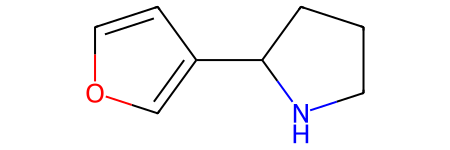

In [19]:
smi = 'N1CCCC1c1cocc1'  # can you guess what molecule this is?
mol = Chem.MolFromSmiles(smi)

# NOTE: whatever object you place at the end of a cell will be displayed
mol

Hmm, the default `__repr__` function for the RDKit Mol class is not very useful is it. Thankfully, RDKit supplies a useful module for automatically converting Mol objects to images.

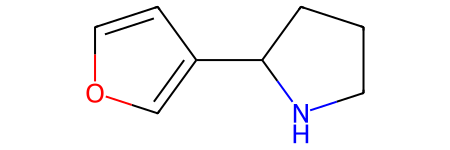

In [20]:
from rdkit.Chem.Draw import IPythonConsole

mol

As a cheminformatician, there are a few things I do reasonably often.
* Manipulate molecular structures
  * Add explicit hydrogens
  * Transform functional groups (virtual reactions)
* Generate and rank conformers
* Calculate descriptors

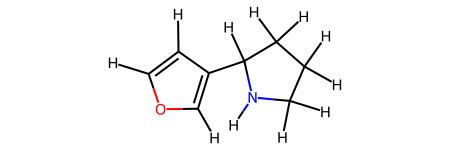

In [21]:
# Chem.AddHs returns a copy of the mol but with implicit hydrogens converted to explicit hydrogens
mol_with_hs = Chem.AddHs(mol)
mol_with_hs

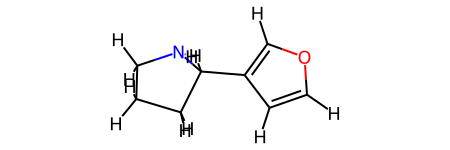

In [22]:
# Chem.AllChem.EmbedMolecule adds a conformer to the molecule in-place, meaning the original molecule is modified and nothing is returned
from rdkit.Chem import AllChem

AllChem.EmbedMolecule(mol_with_hs)
mol_with_hs

In [33]:
# Chem.Descriptors and Chem.Descriptors.rdMolDescriptors contain most of the common descriptors available in RDKit
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

print('MW:', Descriptors.MolWt(mol))
print('cLogP:', Descriptors.MolLogP(mol))
print('# HBA:', rdMolDescriptors.CalcNumLipinskiHBA(mol))
print('# HBD:', rdMolDescriptors.CalcNumLipinskiHBD(mol))
print('tPSA:', rdMolDescriptors.CalcTPSA(mol))

MW: 137.182
cLogP: 1.7041
# HBA: 2
# HBD: 1
tPSA: 25.17


## A Short Rant

I'm sure you can already see that RDKit is very ... quirky. If you will humor me, here are a few examples.

In [ ]:
# this just feels so much cleaner
# also why is the module name capitalized, big ew
import rdkit  # expectation
from rdkit import Chem  # reality

# my object-oriented expectations are that constructors SHOULD be a classmethod of the class
mol = rdkit.mol.from_smiles(smi)  # expectation
mol = Chem.MolFromSmiles(smi)  # reality

# you will find a lot of module duplication, where there are two distinct
#  modules which really cover the same purpose
from rdkit.descriptors import mol_wt, tpsa  # expectation
from rdkit.Chem.Descriptors import MolWt  # reality
from rdkit.Chem.rdMolDescriptors import CalcTPSA  # reality

# some methods return a copy of the mol without modifying the originals, others modify the original and return nothing
# instead, methods should return a copy by default and have a parameter to modify in place
AddHs(mol)  # returns a copy
EmbedMolecule(mol)  # modifies in place ... why?

My biggest gripe with RDKit? It's documentation ranges from great to terrible.

If I'm trying to dig into a new package, I will google something like "package_name class_name documentation". But when I was first starting out and Google searched "rdkit mol documentation", my search results put the correct page result (rdkit.Chem.rdchem module) as the 6th result. This made it really hard to access the information I needed. RDKit's Python documentation needs a major overhaul.

On the other hand, the RDKit Cookbook and Getting Started pages are excellent with lots of great examples and code snippets. But you will very quickly learn that searching the RDKit documentation is a separate skill-set that you will need to master alongside the skill-set of programming with RDKit.

## Practice Problems

How about we try some practice problems. Here are a few common cheminformatics functions that will be good introductory problems.

#### Lipinski's Rule of 5

A molecule satisfies Lipinski's Rule of 5 if all the conditions are satisfied:
* \# HBDs <= 5
* \# HBAs <= 10
* MW <= 500
* LogD <= 5

Fill in the function that checks if a molecule satisfies Lipinski's Rule of 5.

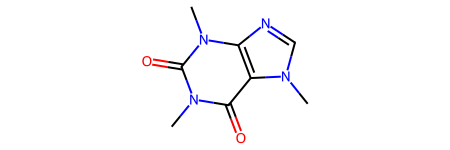

your answer: True
✅


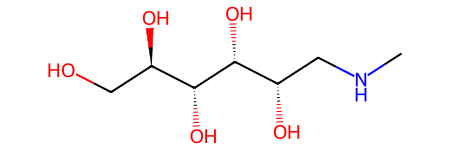

your answer: True
❌


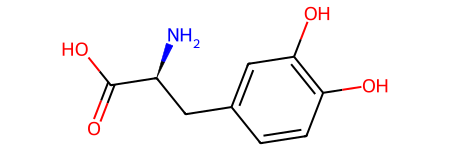

your answer: True
✅


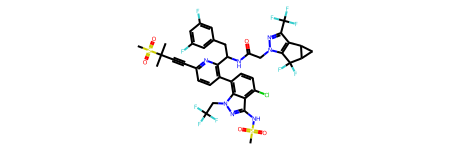

your answer: True
❌


In [47]:
from rdkit.Chem.Descriptors import MolWt, MolLogP, rdMolDescriptors
from rdkit.Chem.rdMolDescriptors import CalcNumLipinskiHBA, CalcNumLipinskiHBD

smiles = [
    "CN1C=NC2=C1C(=O)N(C)C(=O)N2C",
    "CNC[C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO",
    "N[C@@H](CC1=CC(O)=C(O)C=C1)C(O)=O",
    "CC(C)(C#CC1=NC(=C(C=C1)C2=C3C(=C(C=C2)Cl)C(=NN3CC(F)(F)F)NS(=O)(=O)C)C(CC4=CC(=CC(=C4)F)F)NC(=O)CN5C6=C(C7CC7C6(F)F)C(=N5)C(F)(F)F)S(=O)(=O)C",
]
answers = [True, False, True, False]

def lipinski_ro5(smi: str) -> bool:
  """
  Return True if mol satisfies Ro5, False if mol breaks Ro5.
  """
  mol = Chem.MolFromSmiles(smi)
  is_bad_mol = False

  ### FILL IN THE CODE ###

  ### ### ## ## ## ### ###

  return not is_bad_mol

for smi, answer in zip(smiles, answers):
  display(Chem.MolFromSmiles(smi))
  your_answer = lipinski_ro5(smi)
  print("your answer:", your_answer)
  print("✅" if answer == your_answer else "❌")
  print("======================================================")